# Homework 2

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.io import mmread
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity
from collections import Counter

### Question 1
**(a)** 

In [10]:

def a_configuration_model(degree_sequence): #degree_sequence: (list[int])
    # G = nx.configuration_model(degree_sequence) 
    # Return G //Ok, done.

    if sum(degree_sequence)% 2 != 0:
        raise ValueError("")
        
    G = nx.MultiGraph()
    n = len(degree_sequence)
    G.add_nodes_from(range(n))

    stubs = [] #Create a corresponding number of half-edges for each node
    for node, degree in enumerate(degree_sequence):
        stubs.extend([node]*degree)

    # random it
    random.shuffle(stubs) 

    # Pair the half edges together to form edges
    while stubs:
        u = stubs.pop()
        v = stubs.pop()
        G.add_edge(u,v)
    return G

**(b)**

In [11]:
def b_chuang_lu_random_graph(degree_sequence):
    if sum(degree_sequence)% 2 != 0:
        raise ValueError("")
        
    G = nx.Graph()
    n = len(degree_sequence)
    G.add_nodes_from(range(n))
    total_degree = sum(degree_sequence)

    # Calculate the probability of each pair of nodes and randomly decide whether to add an edge
    for i in range(n):
        for j in range(i + 1, n):
            pij = (degree_sequence[i] * degree_sequence[j]) / total_degree
            pij = min(pij, 1.0) #Prevent some nodes from having large degrees
            if random.random() < pij:
                G.add_edge(i, j)
    return G


**(c)**

(i):

In [6]:
degrees = [8, 5, 5, 4, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

In [30]:


N = 1000
n = len(degrees)
avg_matrix_config = np.zeros((n,n))
avg_matrix_chuang = np.zeros((n,n))

# Generate 1000 graphs & calculate average adjacency matrix
for _ in range(N):
    G_config = a_configuration_model(degrees)
    # emove self-loops and duplicate edges
    G_config = nx.Graph(G_config)
    G_config.remove_edges_from(nx.selfloop_edges(G_config)) 
    G_chuang = b_chuang_lu_random_graph(degrees)
    
    A_config = nx.to_numpy_array(G_config)
    A_chuang = nx.to_numpy_array(G_chuang)
    avg_matrix_config += A_config
    avg_matrix_chuang += A_chuang
avg_matrix_config /= N
avg_matrix_chuang /= N

print("Configuration Model Average Adjacency Matrix:")
print(avg_matrix_config)
print("Chung-Lu Model Average Adjacency Matrix:")
print(avg_matrix_chuang)

Configuration Model Average Adjacency Matrix:
[[0.    0.728 0.692 0.61  0.563 0.396 0.414 0.355 0.203 0.215 0.216 0.232
  0.215 0.232 0.221]
 [0.728 0.    0.561 0.463 0.366 0.259 0.244 0.269 0.137 0.143 0.139 0.108
  0.109 0.138 0.126]
 [0.692 0.561 0.    0.444 0.343 0.247 0.251 0.244 0.125 0.13  0.125 0.129
  0.142 0.14  0.142]
 [0.61  0.463 0.444 0.    0.264 0.214 0.205 0.2   0.119 0.106 0.111 0.106
  0.103 0.109 0.107]
 [0.563 0.366 0.343 0.264 0.    0.145 0.155 0.16  0.084 0.09  0.093 0.088
  0.09  0.072 0.096]
 [0.396 0.259 0.247 0.214 0.145 0.    0.103 0.113 0.053 0.054 0.06  0.053
  0.056 0.054 0.057]
 [0.414 0.244 0.251 0.205 0.155 0.103 0.    0.111 0.055 0.051 0.054 0.059
  0.066 0.051 0.052]
 [0.355 0.269 0.244 0.2   0.16  0.113 0.111 0.    0.055 0.064 0.048 0.059
  0.052 0.052 0.056]
 [0.203 0.137 0.125 0.119 0.084 0.053 0.055 0.055 0.    0.032 0.031 0.027
  0.031 0.022 0.026]
 [0.215 0.143 0.13  0.106 0.09  0.054 0.051 0.064 0.032 0.    0.03  0.023
  0.022 0.026 0.014]
 [0.

(i):

I am choose average degree for the approximate data and choose clustering coefficient for significantly divergent data

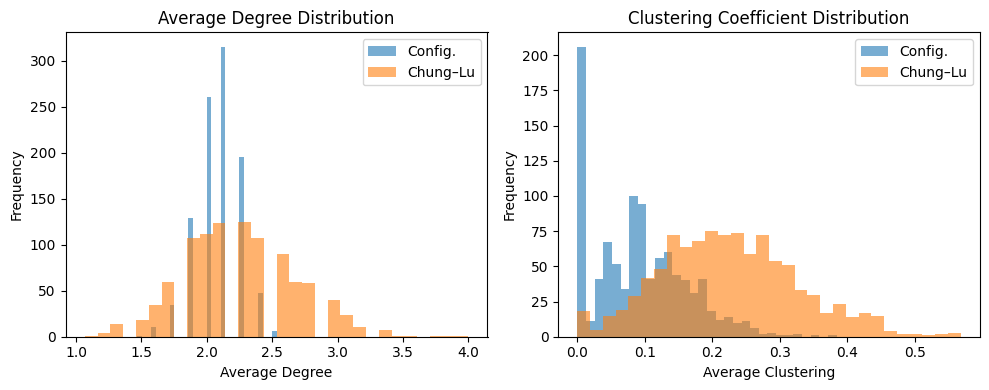

In [32]:
# Define a function to help us calculate the average degree and clustering coefficient of each generated graph
def generate_metric_distributions(degree_sequence, model=None, N=1000):
    clustering_vals = []
    avg_degree_vals = []
    
    for _ in range(N):
        if model == "config":
            G = a_configuration_model(degrees)
            # emove self-loops and duplicate edges
            G = nx.Graph(G)
            G.remove_edges_from(nx.selfloop_edges(G))
        elif model == "chuang":
            G = b_chuang_lu_random_graph(degrees)
        else:
            raise("")
        clustering_vals.append(nx.average_clustering(G))
        avg_degree_vals.append(np.mean([d for n, d in G.degree()]))
    return clustering_vals, avg_degree_vals

cl_conf, deg_conf = generate_metric_distributions(degrees,model = "config")
cl_clu, deg_clu = generate_metric_distributions(degrees,model = "chuang")

# 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(deg_conf, bins=30, alpha=0.6, label="Config.")
plt.hist(deg_clu, bins=30, alpha=0.6, label="Chung–Lu")
plt.title("Average Degree Distribution")
plt.xlabel("Average Degree")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1,2,2)
plt.hist(cl_conf, bins=30, alpha=0.6, label="Config.")
plt.hist(cl_clu, bins=30, alpha=0.6, label="Chung–Lu")
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Average Clustering")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

Experimental results show that the Configuration Model and the Chung–Lu Model exhibit similar average degree distributions, both reproducing the given degree sequence well. However, there is a significant difference in their clustering coefficients: the Chung–Lu model exhibits a significantly higher average clustering coefficient than the Configuration Model due to the higher probability of edges connecting high-degree nodes. This suggests that the Chung–Lu model, while preserving the degree sequence, produces more localized clusters, while the Configuration Model is closer to a completely random network structure.

### Question 2

**(a)**

i: I used greedy_modularity_communities as my modularity maximization algorithm to detect communities in this graph.https://networkrepository.com/econ-mahindas.php

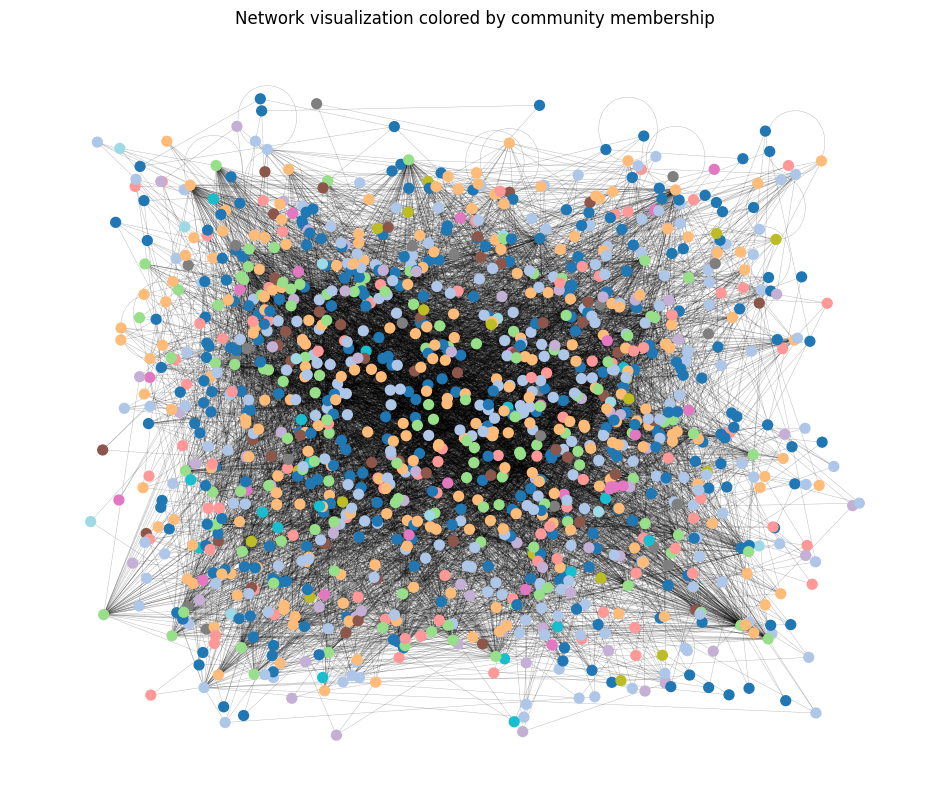

In [3]:
file_path = "econ-mahindas.mtx"
A = mmread(file_path)
G = nx.from_scipy_sparse_array(A)
communities = list(greedy_modularity_communities(G))

# Map nodes to community IDs
partition = {}
for i, comm in enumerate(communities):
    for node in comm:
        partition[node] = i

pos = nx.spring_layout(G, seed=42)

colors = [partition[n] for n in G.nodes()]

plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.3)
plt.title("Network visualization colored by community membership")
plt.axis("off")
plt.show()


ii: In the visualization of the econ-mahindas network, the nodes and edges appear evenly distributed without distinct clusters or dense blocks. Although the nodes are colored by their community membership, the boundaries between colors are diffuse, and there are many inter-community connections.
This visual pattern aligns with the low modularity value (0.0011), indicating that the detected communities are not well-defined. The edges are almost randomly distributed across the network, suggesting weak or negligible community structure. 

In [5]:
Q = modularity(G, communities)
print(f"Modularity: {Q:.4f}")

Modularity: 0.0011


In [6]:
# iii:
print("Number of communities detected:", len(communities))

Number of communities detected: 12


In [12]:
# iv: 
print("Partition (node → community):", dict(list(partition.items())[:10]))

Partition (node → community): {1038: 0, 1039: 0, 1040: 0, 1041: 0, 1042: 0, 1043: 0, 1044: 0, 1045: 0, 1046: 0, 1047: 0}


**(b)**:


In [11]:
G_random = G.copy()
nx.double_edge_swap(G_random, nswap=5, max_tries=100)
random_communities = list(greedy_modularity_communities(G_random))
random_partition = {}
for i, comm in enumerate(random_communities):
    for node in comm:
        random_partition[node] = i
print("Randomized network partition (node → community):", dict(list(random_partition.items())[:10]))

Randomized network partition (node → community): {1038: 0, 1039: 0, 1040: 0, 1041: 0, 1042: 0, 1043: 0, 1044: 0, 1045: 0, 1046: 0, 1047: 0}


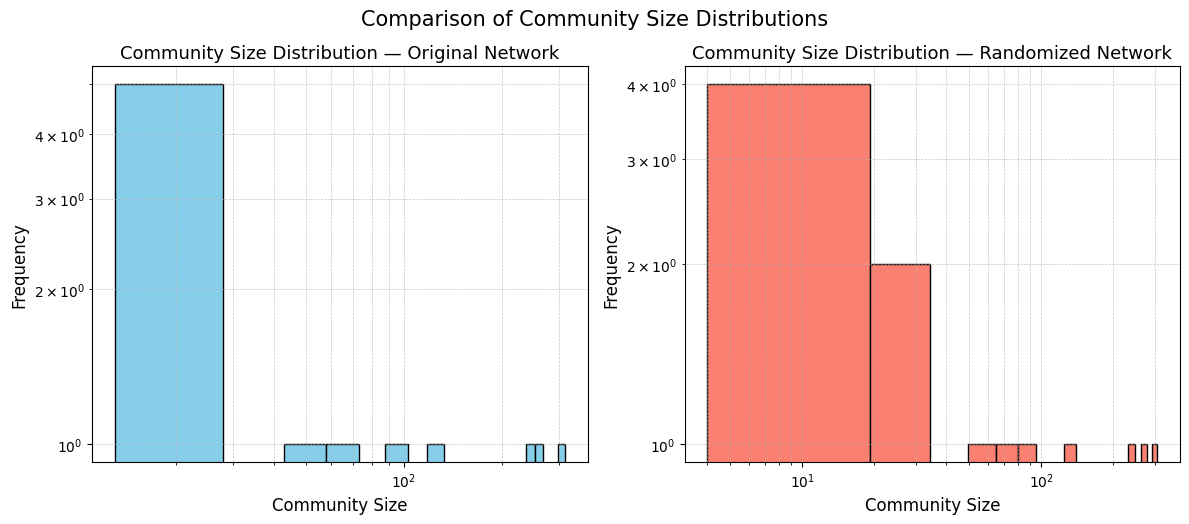

In [25]:
# use a function calculate the size of each community
def get_community_sizes(partition):
    community_sizes = Counter(partition.values())
    return np.array(list(community_sizes.values()))

original_sizes = get_community_sizes(partition)
random_sizes = get_community_sizes(random_partition)

plt.figure(figsize=(12, 5))

# edit Subgraph1 for origenal graph
plt.subplot(1, 2, 1)
plt.hist(original_sizes, bins=20, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Community Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Community Size Distribution — Original Network", fontsize=13)
#add grid make it more readable
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# edit Subgraph2 for randomized graph
plt.subplot(1, 2, 2)
plt.hist(random_sizes, bins=20, color='salmon', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Community Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Community Size Distribution — Randomized Network", fontsize=13)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

#create title for whole graph
plt.tight_layout()
plt.suptitle("Comparison of Community Size Distributions", fontsize=15, y=1.04)
plt.show()

**（d）**
To compare different partitions, each community can be represented by a vector, and then the similarity can be quantified in the vector space. For each community in P1 and P2, construct a binary vector $\mathbf{v}$. For partitions $\pi = \{C_1^\pi, \dots\}$ and $\rho = \{C_1^\rho, \dots\}$, computre the similarity between each pair of community vectors$(\mathbf{v}_i^\pi, \mathbf{v}_j^\rho)$, just like the one we discussed in class.

### Question 3

**(i)**:

In [30]:
def preferentialGenerator(n, a):
    G = nx.Graph()
    # initialization graph with two node
    G.add_edge(0,1)

    #list of degree
    degree = np.array([1,1])

    for new_node in range(2,n):
        # P(i) = (k_i^alpha + 1)/ k_sum
        prob = np.power(degree,a) + 1
        prob = prob / prob.sum()
        target = np.random.choice(len(degree), p=prob)

        G.add_node(new_node)
        G.add_edge(new_node,int(target))

        degree = np.append(degree,1)
        degree[target] += 1

    return G
    
    

**(ii)**:

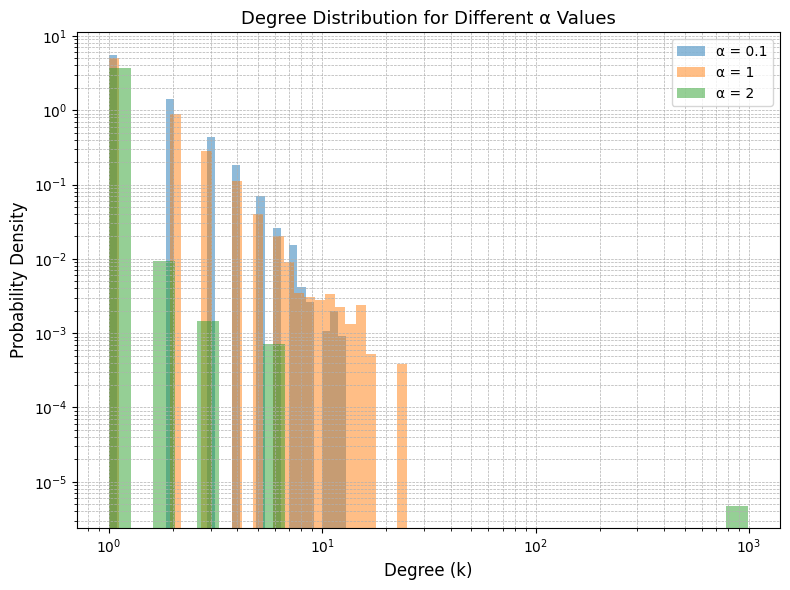

In [36]:
# test parameters
n = 1000
alphas = [0.1, 1, 2]

graphs = [preferentialGenerator(n, alpha) for alpha in alphas]
degree_lists = [np.array([d for _, d in G.degree()]) for G in graphs]

plt.figure(figsize=(8, 6))
for degree_list, alpha in zip(degree_lists, alphas):
    plt.hist(degree_list, 
             bins=np.logspace(np.log10(1), np.log10(max(degree_list)+1), 30),
             density=True, 
             alpha=0.5, 
             label=f'α = {alpha}')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Degree Distribution for Different α Values', fontsize=13)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

**(iii)**:

In [43]:
def randomWalkGenerator(n, p):
    G = nx.Graph()
    G.add_edge(0,1)

    for new_node in range(2,n):
        target = random.choice(list(G.nodes()))
        
        # The generation logic of the second edge
        if random.random() < p:
            neighbors = list(G.neighbors(target))
            if neighbors:
                k = random.choice(neighbors)
            # handle the situation that no neighbors
            else:
                k = random.choice(list(G.nodes()))
        else:
            k = random.choice(list(G.nodes()))
        G.add_edge(new_node,target)
        G.add_edge(new_node,k)
    return G

**(iv)**:

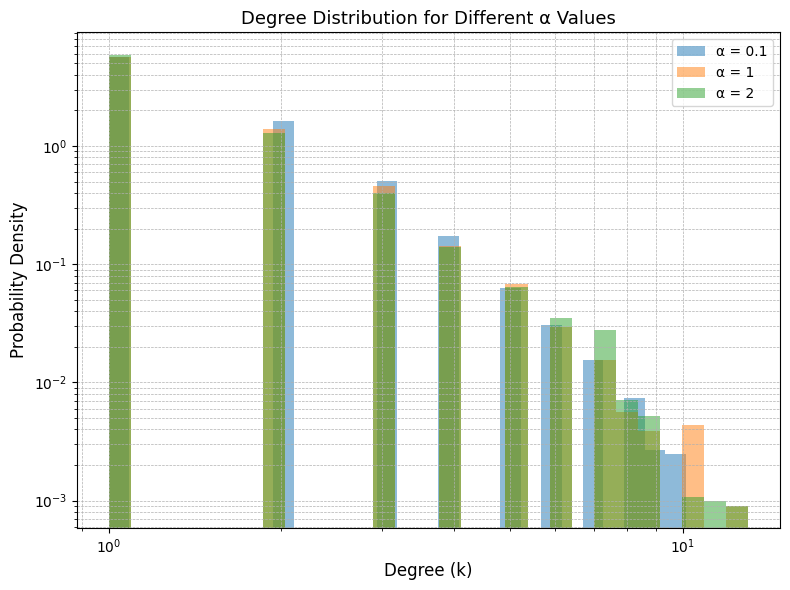

In [46]:
n = 1000
p_values = [0, 0.1, 0.5, 0.9]

graphs = [preferentialGenerator(n, p_value) for p_value in p_values]
degree_lists = [np.array([d for _, d in G.degree()]) for G in graphs]

plt.figure(figsize=(8, 6))
for degree_list, alpha in zip(degree_lists, alphas):
    plt.hist(degree_list, 
             bins=np.logspace(np.log10(1), np.log10(max(degree_list)+1), 30),
             density=True, 
             alpha=0.5, 
             label=f'α = {alpha}')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree (k)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Degree Distribution for Different α Values', fontsize=13)
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

**(v)**:

The Random Walk Model structure is likely closer to a random graph, with a relatively uniform distribution of node degree. The figure shows no obvious hubs, and the connections between nodes are relatively even. However, for the preferentialGenerator, a few highly connected hub nodes and a large number of low-connectivity nodes. The diagram shows several very large nodes (hubs) connecting many other nodes.  

Application of the Null Model:    
The preferential generator model is used to examine whether a network exhibits a higher-than-expected clustering coefficient or community structure.They typically have lower clustering coefficients. If the clustering coefficient of the real network is significantly higher than the model's prediction, it indicates the presence of mechanisms such as triadic closure or homophily within the network.
  
The Random Walk Model is used to examine whether the topological characteristics of a network exceed pure randomness. For example, examine whether the shortest path length or clustering coefficient of a real network differs significantly from a null model of purely random connections to confirm its other non-random characteristics.  

### Question 4